In [1]:
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import easyocr
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

model = YOLO("./models/bestori_n.pt")
names = model.names

img_path = "./img_test/img4.png"

# Prepare Image

libpng warning: iCCP: known incorrect sRGB profile


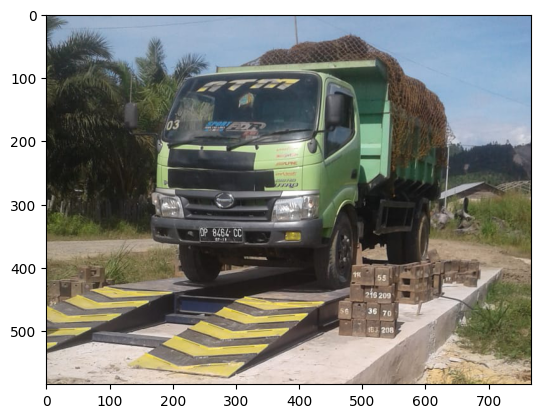

In [47]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


0: 512x640 1 plate, 1 truck, 88.8ms
Speed: 1.5ms preprocess, 88.8ms inference, 0.4ms postprocess per image at shape (1, 3, 512, 640)


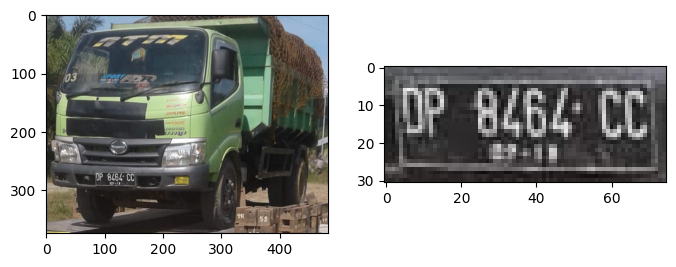

In [57]:
detections = model.predict(img)[0]

w = 640
h = 480
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1

for i, detection in enumerate(detections.boxes.data.tolist()):
        x1,y1,x2,y2,conf,cls = detection
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img[int(y1):int(y2), int(x1):int(x2), :])
        if names[int(cls)] == 'plate':
            crop_plate = img[int(y1):int(y2), int(x1):int(x2), :]
plt.show()

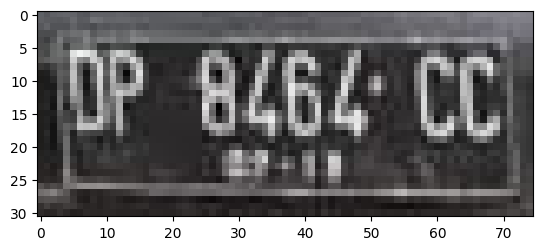

In [58]:
crop_plate = None
for detection in detections.boxes.data.tolist():
    x1,y1,x2,y2,conf,clss = detection
    if conf > 0.5 and names[int(clss)] == 'plate':
        crop_plate = img[int(y1):int(y2), int(x1):int(x2), :]
plt.imshow(crop_plate)

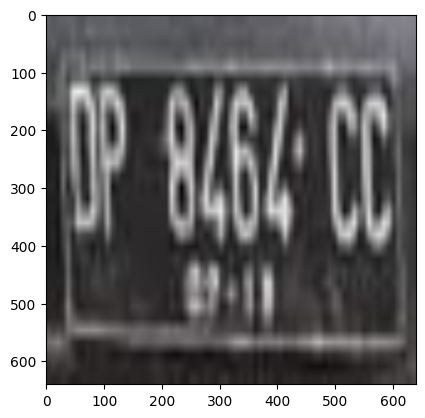

In [60]:
resize_crop_plate = cv2.resize(crop_plate, (640, 640))
plt.imshow(resize_crop_plate)

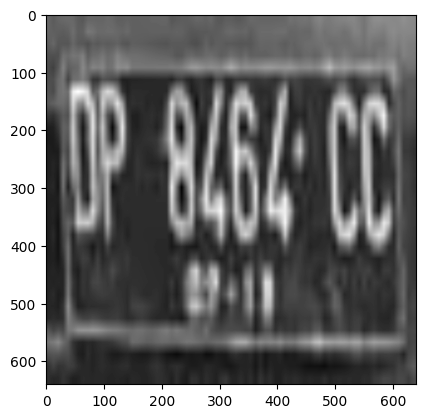

In [61]:
gray_crop = cv2.cvtColor(resize_crop_plate, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_crop, cmap="gray")

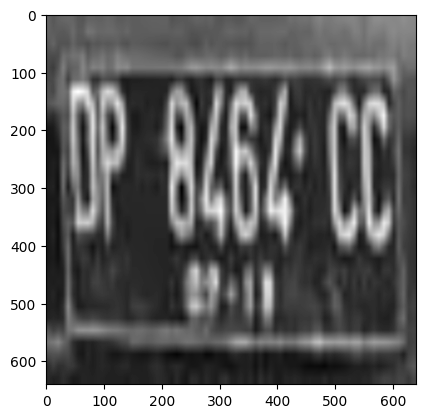

In [62]:
gaus_blur = cv2.GaussianBlur(gray_crop, (3,3), 0)
plt.imshow(gaus_blur, cmap="gray")

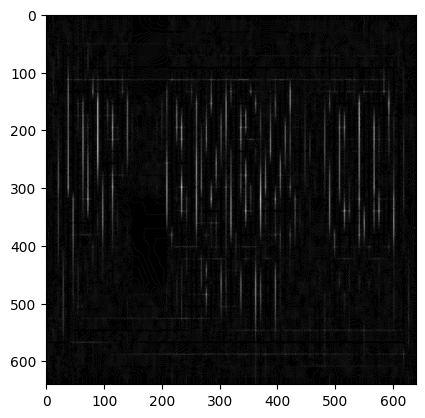

In [63]:
laplacian_crop = cv2.Laplacian(gaus_blur, cv2.CV_8UC2)
plt.imshow(laplacian_crop, cmap="gray")

(640, 640)


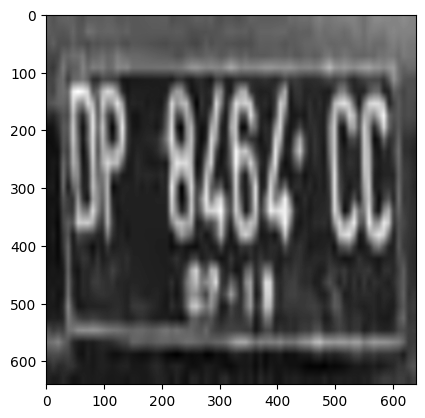

In [64]:
sharpened_crop = gaus_blur + laplacian_crop
# sharpened_crop = resize_crop_plate + np.expand_dims(laplacian_crop, axis=-1)
print(sharpened_crop.shape)
plt.imshow(sharpened_crop, cmap="gray")

In [65]:
def edgePreserve(s=50,r=0.5):
    edgeImg = cv2.edgePreservingFilter(sharpened_crop, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(sharpened_crop)
    plt.yticks([]),plt.xticks([])
    plt.title("Sharpened Crop")
    plt.subplot(1,2,2)
    plt.imshow(edgeImg)
    plt.yticks([]),plt.xticks([])
    plt.title("Filter Edge")
    plt.show()

In [66]:
interact(edgePreserve, s=(0,200,1),r=(0,1,0.1))

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

<function __main__.edgePreserve(s=50, r=0.5)>

(640, 640, 3)


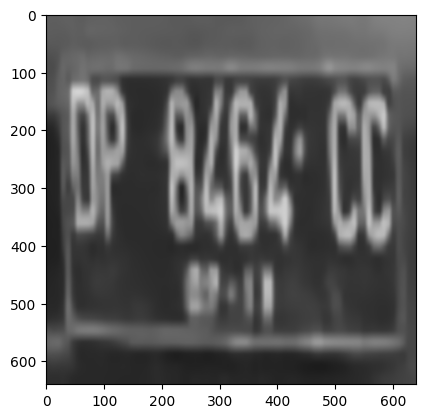

In [67]:
edgeFilter = cv2.edgePreservingFilter(sharpened_crop, sigma_s=25, sigma_r=0.1)
edgeFilter = cv2.cvtColor(edgeFilter, cv2.COLOR_GRAY2BGR)
print(edgeFilter.shape)
plt.imshow(edgeFilter)

In [68]:
# @widget.interact(s=(0,200,1),r=(0,1,0.1))
def detail(s=20,r=0.2):
    detailimg = cv2.detailEnhance(edgeFilter, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(sharpened_crop)
    plt.yticks([]),plt.xticks([])
    plt.title("Sharpened Crop")
    plt.subplot(1,2,2)
    plt.imshow(detailimg)
    plt.yticks([]),plt.xticks([])
    plt.title("Detail Enchance")
    plt.show()

In [69]:
interact(detail, s=(0,200,1),r=(0,1,0.1))

interactive(children=(IntSlider(value=20, description='s', max=200), FloatSlider(value=0.2, description='r', m…

<function __main__.detail(s=20, r=0.2)>

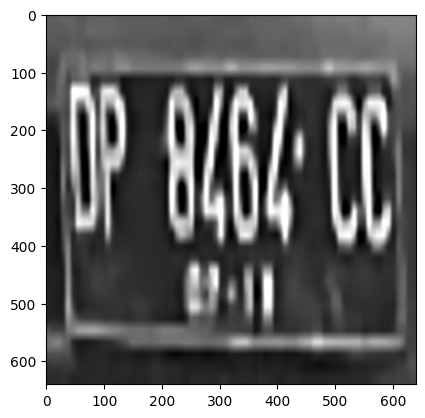

In [70]:
enchance_detail = cv2.detailEnhance(edgeFilter, sigma_s=12, sigma_r=0.4)
plt.imshow(enchance_detail)

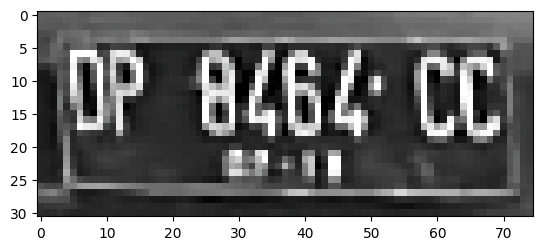

In [71]:
enchance_detail = cv2.resize(enchance_detail, (crop_plate.shape[1], crop_plate.shape[0]))
plt.imshow(enchance_detail)

In [72]:
def bin_threshold(min=0, max=255):
    thresh = cv2.threshold(edgeFilter, min, max, cv2.THRESH_TRUNC)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.imshow(edgeFilter)
    plt.yticks([]),plt.xticks([])
    plt.title("edgeFilter")
    plt.subplot(1,2,2)
    plt.imshow(thresh)
    plt.yticks([]),plt.xticks([])
    plt.title("thresh")
    plt.show()

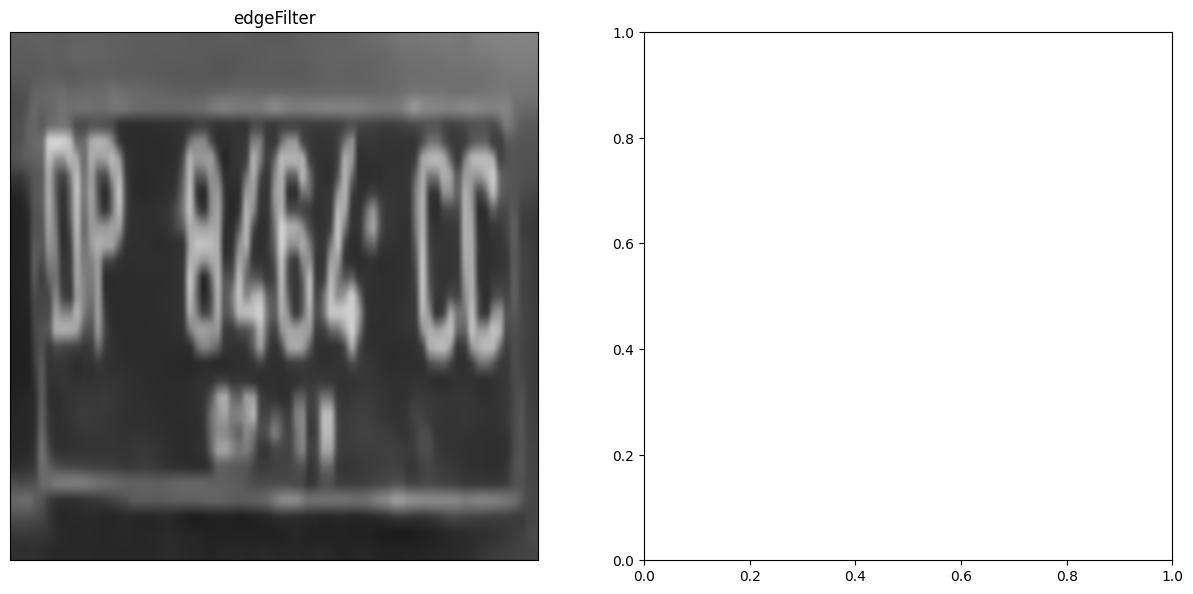

interactive(children=(IntSlider(value=0, description='min', max=255), IntSlider(value=255, description='max', …

<function __main__.bin_threshold(min=0, max=255)>

In [74]:
interact(bin_threshold, min=(0,255,1),max=(0,255,255))